# Economic Indicators

This code file is meant to capture the relevant economic indicators for plotting and analysis.

Outstanding tasks include:
* Add data for more economic indicators from the remaining Fed districts
* Uncover how to set the major ticks 1 yr apart
* Clean up the code
* Perform time series lag correlation analysis

In [2]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# Read data
# New York Empire State data
empire_df = pd.read_csv('./Inputs/ESMS_SeasonallyAdjusted_Diffusion.csv')
empire_clean_df = empire_df[['surveyDate','GACDISA']]
empire_clean_df = empire_clean_df.rename(columns={
    "surveyDate":"Date",
    "GACDISA":"Empire_St"
})
empire_clean_df = empire_clean_df.set_index(['Date'])
empire_clean_df.tail()

,Empire_St
Date,
2021-04-30,26.3
2021-05-31,24.3
2021-06-30,17.4
2021-07-31,43.0
2021-08-31,18.3


In [4]:
empire_clean_df.index = pd.to_datetime(empire_clean_df.index)

In [10]:
empire_clean_df.tail()

,Empire_St
Date,
2021-04-30,26.3
2021-05-31,24.3
2021-06-30,17.4
2021-07-31,43.0
2021-08-31,18.3


In [19]:
# Read data
# Philadelphia Business Outlook Survey data
philly_df = pd.read_csv('./Inputs/bos_dif.csv')
philly_clean_df = philly_df[['DATE','GAC']]
philly_clean_df = philly_clean_df.rename(columns={
    "DATE":"Date",
    "GAC":"Philly"
})
philly_clean_df = philly_clean_df.set_index(['Date'])
# philly_clean_df.index = pd.to_datetime(philly_clean_df.index)
philly_clean_df.tail()

,Philly
Date,
Apr-21,50.2
May-21,31.5
Jun-21,30.7
Jul-21,21.9
Aug-21,19.4


# New York Empire State Manufacturing Survey

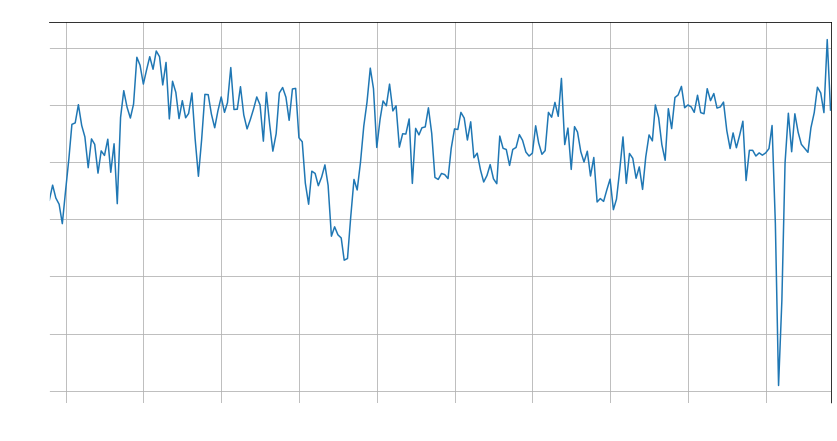

<Figure size 432x288 with 0 Axes>

In [7]:
# Convert start and end date to datetime for plotting purposes
# start_date_obj = datetime.strptime(empire_clean_df.index[0], '%Y-%m-%d')
# end_date_obj = datetime.strptime(empire_clean_df.index[-1], '%Y-%m-%d')
start_date_obj = empire_clean_df.index[0]
end_date_obj = empire_clean_df.index[-1]

# Plot tickers v performance
# empire_clean_df.plot.line(figsize=(15,5),
#                             title='Empire State Business Conditions',
#                             ylabel='Business Conditions Index')
# # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.xlim(start_date_obj,end_date_obj)
# # plt.plot_date(empire_clean_df.index, empire_clean_df.Empire_St, fmt='y')
# plt.grid(color='grey',linestyle='--',linewidth=0.5,alpha=0.8)
# plt.show()

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_xlabel('Years')
ax.set_ylabel('Business Conditions Index')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Empire State Business Conditions",color='w')
plt.xlim(start_date_obj,end_date_obj)
plt.plot(empire_clean_df)
plt.grid()
plt.show()
plt.tight_layout()

In [8]:
start_date_obj

Timestamp('2001-07-31 00:00:00')

# Philadelphia Business Outlook Survey

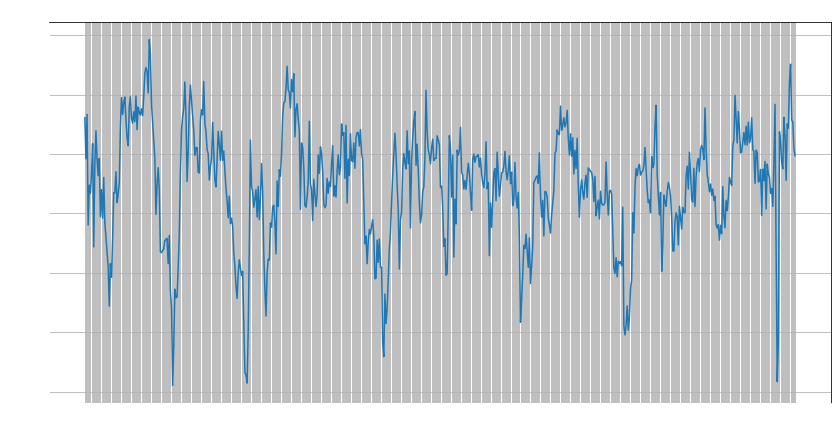

<Figure size 432x288 with 0 Axes>

In [13]:
# Convert start and end date to datetime for plotting purposes
# start_date_obj = datetime.strptime(empire_clean_df.index[0], '%Y-%m-%d')
# end_date_obj = datetime.strptime(empire_clean_df.index[-1], '%Y-%m-%d')
start_date_obj = philly_clean_df.index[0]
end_date_obj = philly_clean_df.index[-1]

# Plot tickers v performance
# empire_clean_df.plot.line(figsize=(15,5),
#                             title='Empire State Business Conditions',
#                             ylabel='Business Conditions Index')
# # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.xlim(start_date_obj,end_date_obj)
# # plt.plot_date(empire_clean_df.index, empire_clean_df.Empire_St, fmt='y')
# plt.grid(color='grey',linestyle='--',linewidth=0.5,alpha=0.8)
# plt.show()

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_xlabel('Years')
ax.set_ylabel('Current Activity Index')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Philadelphia Business Outlook Current Activity",color='w')
# plt.xlim(start_date_obj,end_date_obj)
plt.plot(philly_clean_df)
plt.grid()
plt.show()
plt.tight_layout()

In [14]:
start_date_obj

'May-68'

In [17]:
end_date_obj.dtype()

AttributeError: 'str' object has no attribute 'dtype'